### Importing the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.columns # number of columns with name

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

### Checking the null values in the dataframe

In [5]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1, inplace=True)

seeing the null values we find that some features have more than 50% missing data and we need to remove them

In [7]:
df.shape

(907, 13)

In [8]:
#Statistical description
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data
count,907.000000,861.000000,861.000000,527.000000,519.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0
std,590.085456,6.239612,4.939316,17.082868,0.0
min,0.000000,8.168900,68.644700,1927.000000,2019.0
25%,16.725000,16.773900,74.256200,1988.000000,2019.0
50%,59.200000,21.780000,76.719500,2001.000000,2019.0
75%,385.250000,25.512400,79.440800,2012.000000,2019.0
max,4760.000000,34.649000,95.408000,2018.000000,2019.0


In [9]:
df.nunique() # Counting the uniqueness from the dataset

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

In [10]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

In [11]:
#checking the categorical attributes
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'source',
 'url',
 'geolocation_source']

In [12]:
# counting the values of each categorical attribute to get better understanding of the data
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

country
IND    907
Name: country, dtype: int64

country_long
India    907
Name: country_long, dtype: int64

name
KASRAWAD FACTORY           1
YERMARUS TPP               1
RAMGARH GT                 1
THIROT                     1
JSW RATNAGIRI TPP          1
                          ..
IDUKKI                     1
Dhursar                    1
NAGPUR SPONGE IRON         1
Boha Solar Power Plant     1
Dadri Solar Power Plant    1
Name: name, Length: 907, dtype: int64

gppd_idnr
WRI1019920    1
IND0000355    1
IND0000344    1
WRI1019922    1
IND0000310    1
             ..
WRI1019967    1
IND0000288    1
IND0000455    1
WRI1026093    1
IND0000239    1
Name: gppd_idnr, Length: 907, dtype: int64

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

source
Central Electricity Authority                             519
CDM                                                       124
L

In [13]:
df.drop(['country','country_long','name','url','gppd_idnr','year_of_capacity_data'],axis=1,inplace=True)

with the help of value count and nunique we get count information of all dataset columns.

1.country, country long and year_of_capacity_data column have only 1 unique value i.e IND and India and provide no relevent data so we remove it.

2.Name and gppd_idnr have all unique data in all rows and we can also remove them.`

3.url column have site data which willnot help in making our model so we drop this too.


In [14]:
df.shape

(907, 7)

In [15]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [16]:
#filling the float missing data with mean
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [17]:
#filling the categorical column with the mode
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)


In [18]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [19]:
# Checking he value counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [20]:
#checking the count fot Fuel_type
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [21]:
# Checking the counts of commissioning_year
df['commissioning_year'].value_counts()

2015.0    408
2013.0     25
2012.0     23
2016.0     19
2010.0     18
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [22]:
#finding the plant age subtracting from the year 2019
df['PP_age']=2019-df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [23]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,8.0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,4.0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,4.0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,15.0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,4.0


In [24]:
#checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
num_col
    

['capacity_mw', 'latitude', 'longitude', 'PP_age']

## Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


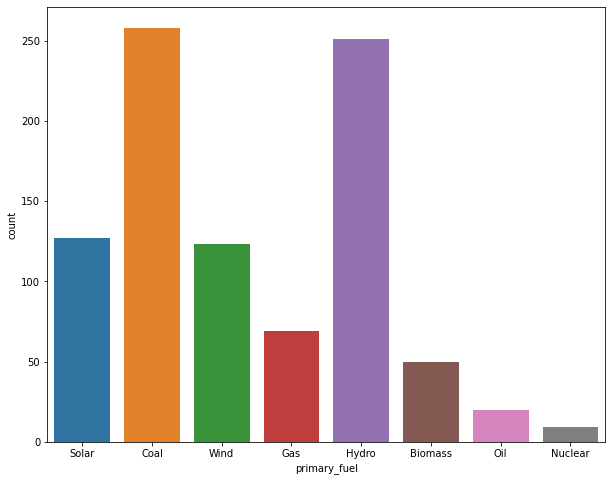

In [25]:
#plot for categorical column
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df['primary_fuel'])
plt.show()

from this plot we analyise that data is imbalance soe we have to balance the data

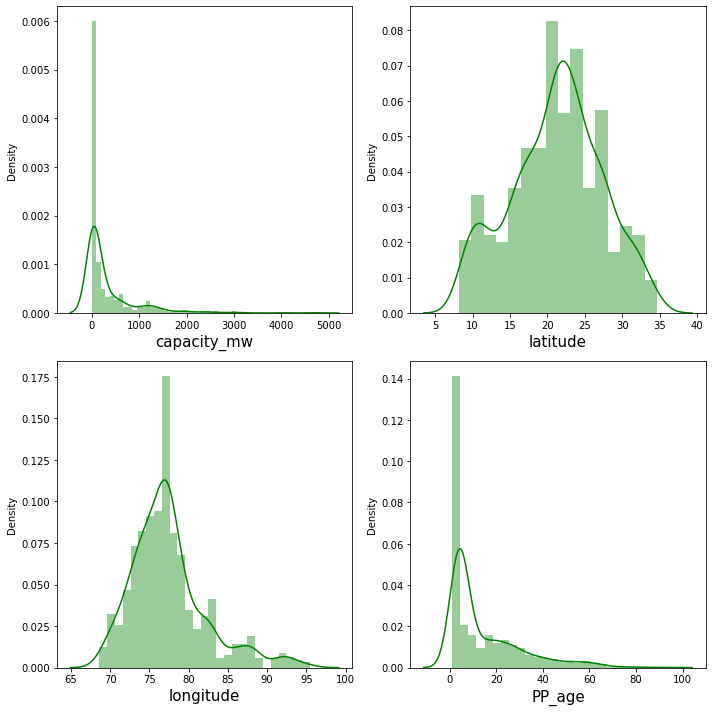

In [26]:
#Visualize the numerical column data
plt.figure(figsize=(10,10))
plotnum=1
for i in num_col:
    if plotnum<=4:
        ax=plt.subplot(2,2,plotnum)
        sns.distplot(df[i],color='g')
        plt.xlabel(i,fontsize=15)
    plotnum+=1
plt.tight_layout()

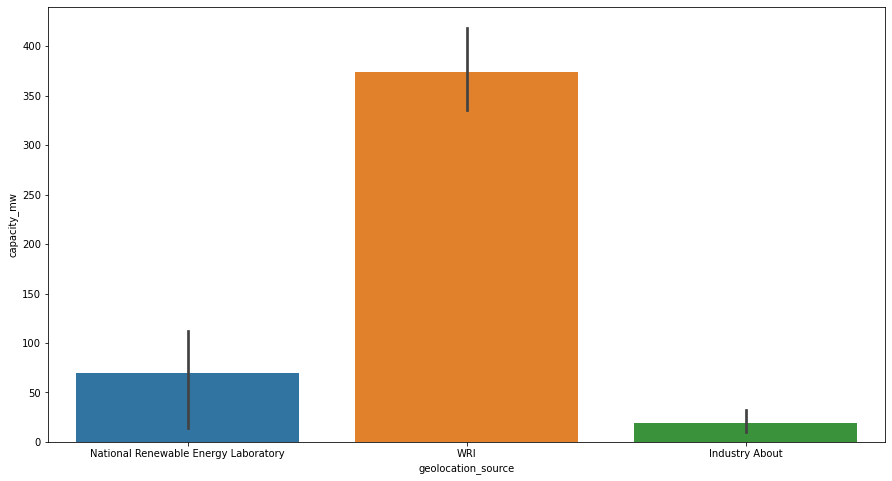

In [27]:
#check the relation between source $ capacity_mw
plt.figure(figsize=(15,8))
sns.barplot(x="geolocation_source",y="capacity_mw",data=df)
plt.show()

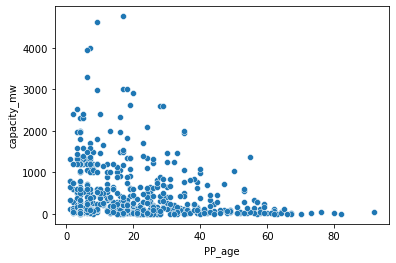

In [28]:
sns.scatterplot(x='PP_age',y='capacity_mw',data=df)
plt.show()

old power plant generate less mega watt for power generation

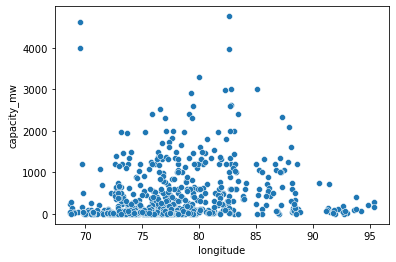

In [29]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df)
plt.show()

highest electicity generation with respect to longitude geolocation is high at 70 and also in between 80-85

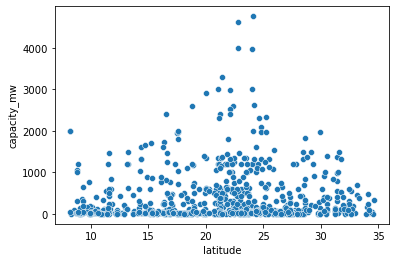

In [30]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df)
plt.show()

highest elecricty genraion wrt latitude geolocation is high between  20-25 degree

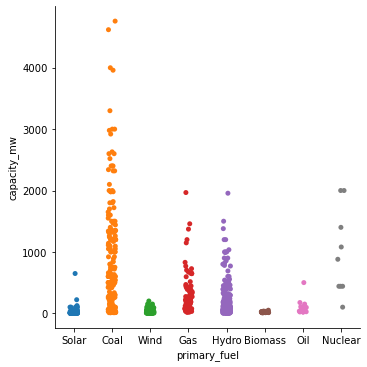

In [31]:
sns.catplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

seeing this graph we see that coal generate more electricity and biomass least

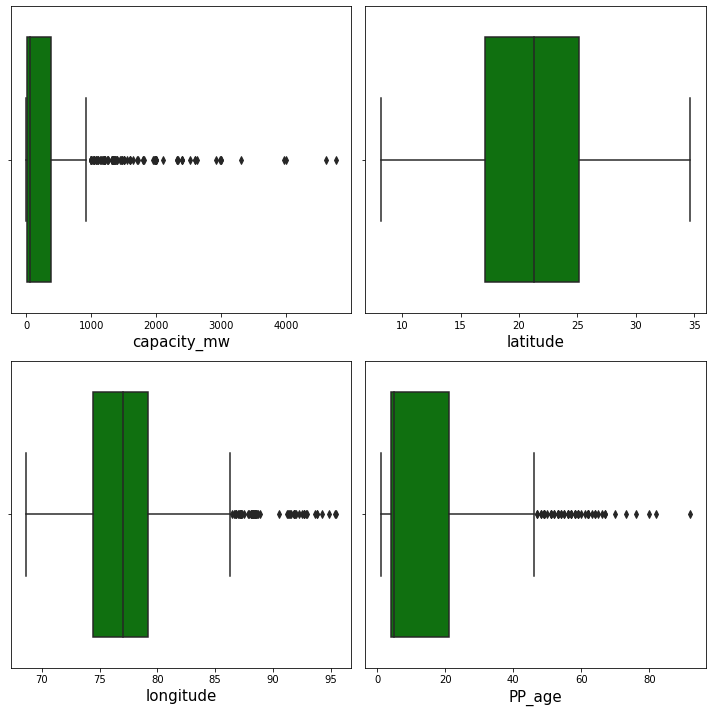

In [32]:
# Boxplot for numerical columns to see outlier
plt.figure(figsize=(10,10))
plotnum=1
for i in num_col:
    if plotnum<=4:
        ax=plt.subplot(2,2,plotnum)
        sns.boxplot(df[i],color='g')
        plt.xlabel(i,fontsize=15)
    plotnum+=1
plt.tight_layout()

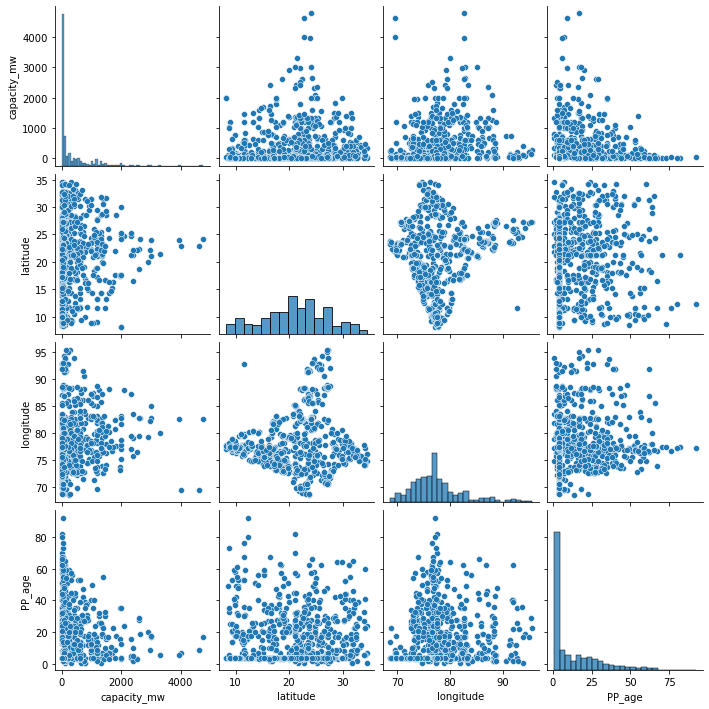

In [33]:
sns.pairplot(df)

In [34]:
#encoding primarya-fuel data columns as Label is used for dependent variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
0,2.5,28.1839,73.2407,6,National Renewable Energy Laboratory,National Renewable Energy Laboratory,8.0
1,98.0,24.7663,74.6090,1,Ultratech Cement ltd,WRI,4.0
2,39.2,21.9038,69.3732,7,CDM,WRI,4.0
3,135.0,23.8712,91.3602,2,Central Electricity Authority,WRI,15.0
4,1800.0,21.9603,82.4091,1,Central Electricity Authority,WRI,4.0


In [35]:
#Ordinal Encoder using for all features so that data get all numerical values
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['source']=oe.fit_transform(df['source'].values.reshape(-1,1))
df['geolocation_source']=oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
0,2.5,28.1839,73.2407,6,109.0,1.0,8.0
1,98.0,24.7663,74.6090,1,174.0,2.0,4.0
2,39.2,21.9038,69.3732,7,21.0,2.0,4.0
3,135.0,23.8712,91.3602,2,22.0,2.0,15.0
4,1800.0,21.9603,82.4091,1,22.0,2.0,4.0


In [36]:
df.corr() # correlation matirx

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.242122,0.204865,0.004072
latitude,0.050984,1.000000,0.036362,-0.010204,0.055927,-0.184275,-0.034519
longitude,0.195882,0.036362,1.000000,-0.347948,-0.239333,0.252343,0.159025
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.053613,-0.483217,-0.164947
source,-0.242122,0.055927,-0.239333,0.053613,1.000000,-0.505720,-0.322222
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.505720,1.000000,0.259929
PP_age,0.004072,-0.034519,0.159025,-0.164947,-0.322222,0.259929,1.000000


## Heatmap

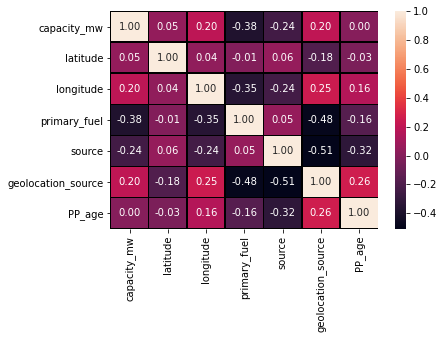

In [37]:
sns.heatmap(df.corr(),annot=True, linecolor='black',linewidth=0.5, fmt='.2f')
plt.show()

In [38]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
PP_age                1.714873
dtype: float64

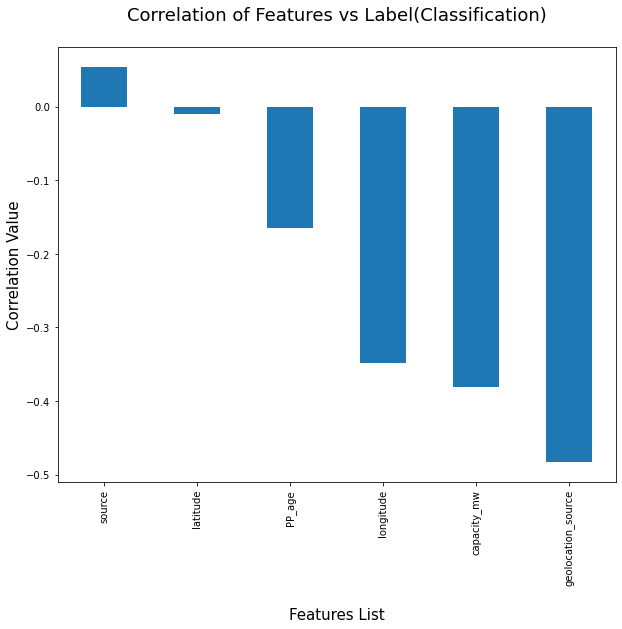

In [39]:
corr=df.corr()
plt.figure(figsize=(10,8))
corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Label(Classification)\n", fontsize=18)
plt.xlabel('\nFeatures List', fontsize=15)
plt.ylabel('Correlation Value', fontsize=15)
plt.show()

Text(0, 0.5, 'Correlation Value')

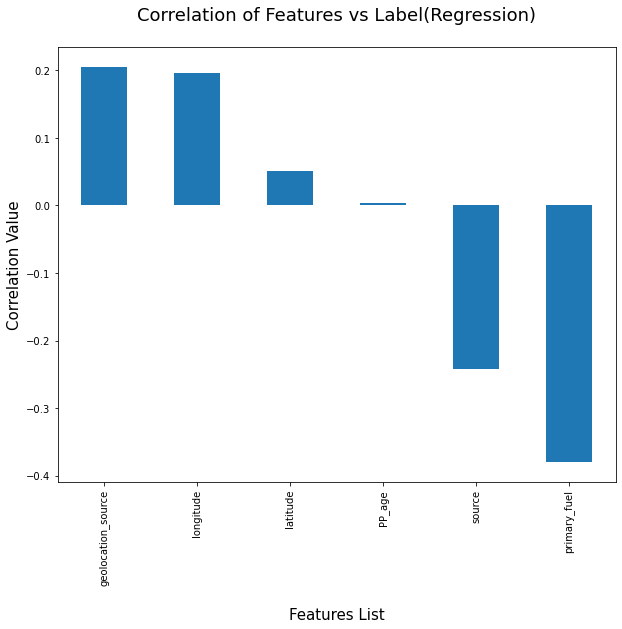

In [40]:
corr=df.corr()
plt.figure(figsize=(10,8))
corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Label(Regression)\n", fontsize=18)
plt.xlabel('\nFeatures List', fontsize=15)
plt.ylabel('Correlation Value', fontsize=15)

In [41]:
from sklearn import metrics
from scipy.stats import zscore

In [42]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]
df=df_new.copy()

In [43]:
print(df.shape)


(838, 7)


In [44]:
loss=(907-838)/907*100
loss

7.6074972436604185

as we see loss percentage is 7% so we can go ahead to build a model

## using log transform for skewness

In [45]:
for col in num_col:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [46]:
df.skew()

capacity_mw           0.066722
latitude             -0.112601
longitude             0.721407
primary_fuel          0.418559
source                1.792245
geolocation_source   -2.112259
PP_age                0.650535
dtype: float64

## splitting the data into  x and y variables

In [47]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
0,1.155327,-0.905807,1.174653,1.578700,-1.059632,-0.087614
1,0.598448,-0.567933,-0.986874,3.125148,0.400848,-0.780279
2,0.132019,-1.895590,1.606958,-0.514953,0.400848,-0.780279
3,0.452596,3.134428,-0.554568,-0.491161,0.400848,0.590412
4,0.141226,1.248497,-0.986874,-0.491161,0.400848,-0.780279


In [50]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["Features"] = x.columns
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif

,Features,VIF values
0,latitude,1.059069
1,longitude,1.267693
2,primary_fuel,1.645071
3,source,1.689698
4,geolocation_source,1.966052
5,PP_age,1.237737


In [51]:
x.head()

,latitude,longitude,primary_fuel,source,geolocation_source,PP_age
0,1.155327,-0.905807,1.174653,1.578700,-1.059632,-0.087614
1,0.598448,-0.567933,-0.986874,3.125148,0.400848,-0.780279
2,0.132019,-1.895590,1.606958,-0.514953,0.400848,-0.780279
3,0.452596,3.134428,-0.554568,-0.491161,0.400848,0.590412
4,0.141226,1.248497,-0.986874,-0.491161,0.400848,-0.780279


# Model Building for Capacity_mw using Regression

### Splitting the data into ttrain and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=200)

In [54]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

## Finding the best random state for building Regression Models

In [55]:
max_acc=0
max_RS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)*100
    
    if r2>max_acc:
        max_acc=r2
        max_RS=i
print('Best R2 score is',max_acc, 'on random state', max_RS)

Best R2 score is 55.774584522199255 on random state 170


In [56]:
# Regression Model Function
def reg(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=170)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred=model.predict(x_test)
    
    #  RMSE
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [57]:
# Linear Regression
model=LinearRegression()
reg(model,x,y)

RMSE Score is: 1.3020931408771774
R2 Score is: 55.774584522199255
Cross Validation Score: 41.980903775190086
R2 Score - Cross Validation Score is 13.79368074700917


In [58]:
# Support Vector Regression
model=SVR()
reg(model,x,y)

RMSE Score is: 1.145972304840879
R2 Score is: 65.74404627361045
Cross Validation Score: 51.647218314630095
R2 Score - Cross Validation Score is 14.096827958980356


In [59]:
# Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model,x,y)

RMSE Score is: 1.4320127387858816
R2 Score is: 46.50889345730752
Cross Validation Score: 34.21274056071755
R2 Score - Cross Validation Score is 12.296152896589973


In [60]:
#Random Forest Regressor
model=RandomForestRegressor()
reg(model,x,y)

RMSE Score is: 1.0939963172554013
R2 Score is: 68.78096034624029
Cross Validation Score: 61.69807641754633
R2 Score - Cross Validation Score is 7.08288392869396


In [61]:
#NNeighbors Regressor
model=KNeighborsRegressor()
reg(model,x,y)

RMSE Score is: 1.1939720765847774
R2 Score is: 62.814283029567264
Cross Validation Score: 54.72612014271911
R2 Score - Cross Validation Score is 8.088162886848153


In [62]:
# AdaBoost Regression
model=AdaBoostRegressor()
reg(model,x,y)

RMSE Score is: 1.1931201572204033
R2 Score is: 62.86732937989823
Cross Validation Score: 55.834023355046924
R2 Score - Cross Validation Score is 7.033306024851306


In [63]:
# Gradient Bossting Regression
model=GradientBoostingRegressor()
reg(model,x,y)

RMSE Score is: 1.0579126933981757
R2 Score is: 70.80641194903407
Cross Validation Score: 61.06272772479111
R2 Score - Cross Validation Score is 9.743684224242962


In [64]:
# XGB Regressor
model=XGBRegressor()
reg(model,x,y)

RMSE Score is: 1.102206915178206
R2 Score is: 68.3105952027755
Cross Validation Score: 56.60949397314583
R2 Score - Cross Validation Score is 11.701101229629671


## Hyper Tunig Parameter for best model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param={'criterion':['mse','mae'],'n_estimators':[50,100],'max_features':['auto','log2','sqrt'],'bootstrap':['True'],'max_depth':[2,4,6]}
GSCV=GridSearchCV(RandomForestRegressor(), param,cv=5)


In [67]:
RandomForestRegressor().get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['True'], 'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [50, 100]})

In [76]:
GSCV.best_params_

{'bootstrap': 'True',
 'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [83]:
capacity = RandomForestRegressor(criterion='mae', max_depth=6, max_features='log2', n_estimators=100,bootstrap=True)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 1.0791519896246637
R2_Score: 64.17242416928575


## HyperTUning with Gradient Boosting Regressor

In [84]:
param1={'criterion':['mse','mae','friedman_mse','squared_error'],'n_estimators':[100,200,300],'learning_rate':[0.1,0.01],'max_features':['auto','log2','sqrt'],'max_depth':[2,4,6,8]}
GSCV1=GridSearchCV(GradientBoostingRegressor(), param1,cv=5)

In [85]:
GSCV1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse',
                                       'squared_error'],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [86]:
GSCV1.best_params_

{'criterion': 'mae',
 'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [94]:
FM = GradientBoostingRegressor(criterion='mae',learning_rate=0.01, max_depth=8, max_features='sqrt', n_estimators=300)
FM.fit(x_train, y_train)
pred1= FM.predict(x_test)
# print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2_Score:',r2_score(y_test,pred1)*100)

R2_Score: 62.507276413752834


## Prediction for Primary Fuel using CLassification 

In [95]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

In [96]:
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

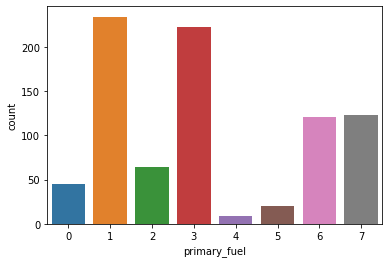

In [97]:
g = sns.countplot(df['primary_fuel'])
g.set_xticklabels(['0','1','2','3','4','5','6','7'])
plt.show()

In [98]:
# class count
primary_fuel_count_0, primary_fuel_count_1,primary_fuel_count_2,primary_fuel_count_3,primary_fuel_count_4,primary_fuel_count_5,primary_fuel_count_6,primary_fuel_count_7= df['primary_fuel'].value_counts()

# Separate class
primary_fuel_0 = df[df['primary_fuel'] == 0]
primary_fuel_1 = df[df['primary_fuel'] == 1]
primary_fuel_2 = df[df['primary_fuel'] == 2]
primary_fuel_3 = df[df['primary_fuel'] == 3]
primary_fuel_4 = df[df['primary_fuel'] == 4]
primary_fuel_5 = df[df['primary_fuel'] == 5]
primary_fuel_6 = df[df['primary_fuel'] == 6]
primary_fuel_7 = df[df['primary_fuel'] == 7]# print the shape of the class
print('primary_fuel 0:', primary_fuel_0.shape)
print('primary_fuel 1:', primary_fuel_1.shape)
print('primary_fuel 2:', primary_fuel_2.shape)
print('primary_fuel 3:', primary_fuel_3.shape)
print('primary_fuel 4:', primary_fuel_4.shape)
print('primary_fuel 5:', primary_fuel_5.shape)
print('primary_fuel 6:', primary_fuel_6.shape)
print('primary_fuel 7:', primary_fuel_7.shape)

primary_fuel 0: (45, 7)
primary_fuel 1: (234, 7)
primary_fuel 2: (64, 7)
primary_fuel 3: (222, 7)
primary_fuel 4: (9, 7)
primary_fuel 5: (20, 7)
primary_fuel 6: (121, 7)
primary_fuel 7: (123, 7)


total primary_fuel of 0,1,2,3,4,5,6 and 7: 0    234
1    234
2    234
3    234
4    234
5    234
6    234
7    234
Name: primary_fuel, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

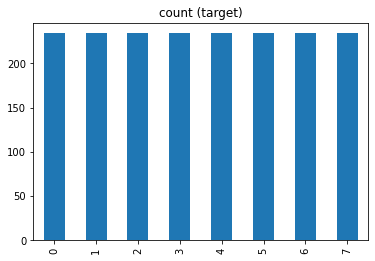

In [99]:
primary_fuel_7_over = primary_fuel_7.sample(primary_fuel_count_0, replace=True)
primary_fuel_6_over = primary_fuel_6.sample(primary_fuel_count_0, replace=True)
primary_fuel_5_over = primary_fuel_5.sample(primary_fuel_count_0, replace=True)
primary_fuel_4_over = primary_fuel_4.sample(primary_fuel_count_0, replace=True)
primary_fuel_3_over = primary_fuel_3.sample(primary_fuel_count_0, replace=True)
primary_fuel_2_over = primary_fuel_2.sample(primary_fuel_count_0, replace=True)
primary_fuel_1_over = primary_fuel_1.sample(primary_fuel_count_0, replace=True)
primary_fuel_0_over = primary_fuel_0.sample(primary_fuel_count_0, replace=True)

test_over= pd.concat([primary_fuel_7_over,primary_fuel_6_over,primary_fuel_5_over,primary_fuel_4_over,primary_fuel_3_over,primary_fuel_2_over,primary_fuel_1_over, primary_fuel_0_over], axis=0)

print("total primary_fuel of 0,1,2,3,4,5,6 and 7:",test_over['primary_fuel'].value_counts())# plot the count after under-sampeling
test_over['primary_fuel'].value_counts().plot(kind='bar', title='count (target)')

In [100]:
X.shape

(838, 6)

In [101]:
Y.shape

(838,)

In [102]:
X.skew()

capacity_mw           0.066722
latitude             -0.112601
longitude             0.721407
source                1.792245
geolocation_source   -2.112259
PP_age                0.650535
dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,capacity_mw,latitude,longitude,source,geolocation_source,PP_age
0,-1.639944,1.155327,-0.905807,1.578700,-1.059632,-0.087614
1,0.186029,0.598448,-0.567933,3.125148,0.400848,-0.780279
2,-0.306337,0.132019,-1.895590,-0.514953,0.400848,-0.780279
3,0.359502,0.452596,3.134428,-0.491161,0.400848,0.590412
4,1.770870,0.141226,1.248497,-0.491161,0.400848,-0.780279
...,...,...,...,...,...,...
833,1.706562,-0.781920,0.092492,-0.491161,0.400848,-1.043237
834,-1.566994,-1.336208,0.282430,0.817372,-2.520112,-0.780279
835,-0.533998,-0.947977,-0.331588,-0.514953,0.400848,-0.780279
836,0.076400,0.530614,-0.779893,0.389125,0.400848,-0.780279


In [104]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.468904,capacity_mw
1,1.070149,latitude
2,1.173381,longitude
3,1.527596,source
4,1.668172,geolocation_source
5,1.204760,PP_age


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [106]:
max_accu=0
max_rs=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred1 = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred1))*100
    
    if acc_score>max_accu:
        max_accu=acc_score
        max_rs=i

print("Best accuracy score is", max_accu,"on Random State", max_rs)

Best accuracy score is 82.14285714285714 on Random State 34


In [107]:
def classify(model,X,Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=34)
    
    model.fit(X_train,Y_train)# training the model
    
    pred1=model.predict(X_test)# predicting the Y_test
    
    cr=classification_report(Y_test,pred1)# classification report
    print('CLassification Report:\n', cr)
    
    acc_score=accuracy_score(Y_test,pred1)*100 # accuracy score
    print('Accuracy score:', acc_score)
    
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100 # cross validation score
    print('Cross Validation Score:',cv_score)
    
    result=acc_score-cv_score # final accuracy result
    print('\nAccuracy score-cross validation scoore is:', result)

In [108]:
model=LogisticRegression()
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.78      0.77      0.77        56
           2       0.00      0.00      0.00         9
           3       0.81      0.90      0.85        48
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        18
           7       0.93      1.00      0.96        25

    accuracy                           0.82       168
   macro avg       0.51      0.57      0.54       168
weighted avg       0.77      0.82      0.79       168

Accuracy score: 82.14285714285714
Cross Validation Score: 73.38893641288851

Accuracy score-cross validation scoore is: 8.753920729968627


In [109]:
model=DecisionTreeClassifier(max_depth=15)
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.77      0.77      0.77        56
           2       0.57      0.44      0.50         9
           3       0.87      0.81      0.84        48
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        25

    accuracy                           0.82       168
   macro avg       0.67      0.73      0.69       168
weighted avg       0.83      0.82      0.83       168

Accuracy score: 82.14285714285714
Cross Validation Score: 78.16010835471914

Accuracy score-cross validation scoore is: 3.9827487881379966


In [110]:
model=RandomForestClassifier(max_depth=15)
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.83      0.89      0.86        56
           2       1.00      0.56      0.71         9
           3       0.94      0.92      0.93        48
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        25

    accuracy                           0.90       168
   macro avg       0.75      0.77      0.74       168
weighted avg       0.90      0.90      0.90       168

Accuracy score: 89.88095238095238
Cross Validation Score: 84.48103792415169

Accuracy score-cross validation scoore is: 5.399914456800687


In [111]:
model=KNeighborsClassifier()
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.84      0.73      0.78        56
           2       0.33      0.33      0.33         9
           3       0.81      0.81      0.81        48
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.95      1.00      0.97        18
           7       0.89      1.00      0.94        25

    accuracy                           0.80       168
   macro avg       0.56      0.60      0.57       168
weighted avg       0.80      0.80      0.80       168

Accuracy score: 80.35714285714286
Cross Validation Score: 78.87653264898775

Accuracy score-cross validation scoore is: 1.4806102081551131


In [112]:
model=SVC()
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.79      0.82      0.81        56
           2       0.00      0.00      0.00         9
           3       0.86      0.92      0.89        48
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        18
           7       0.89      1.00      0.94        25

    accuracy                           0.84       168
   macro avg       0.52      0.57      0.54       168
weighted avg       0.79      0.84      0.81       168

Accuracy score: 83.92857142857143
Cross Validation Score: 76.6096378671229

Accuracy score-cross validation scoore is: 7.318933561448532


In [113]:
model=GradientBoostingClassifier()
classify(model,X,Y)

CLassification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.88      0.89      0.88        56
           2       0.67      0.44      0.53         9
           3       0.90      0.92      0.91        48
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.90      1.00      0.95        18
           7       1.00      1.00      1.00        25

    accuracy                           0.88       168
   macro avg       0.63      0.62      0.62       168
weighted avg       0.87      0.88      0.87       168

Accuracy score: 88.09523809523809
Cross Validation Score: 83.40818363273452

Accuracy score-cross validation scoore is: 4.687054462503568


## Hypertuning Parameters with best selected model

In [114]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,15,20],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy']}

In [115]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3,n_jobs = -1,verbose = 1)

In [116]:
GridCV.fit(X_train,Y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [117]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

In [121]:
Best_mod = RandomForestClassifier(n_estimators = 30,criterion = 'gini', max_depth= 20,min_samples_leaf = 5, min_samples_split = 5)
Best_mod.fit(X_train,Y_train)
rfpred = Best_mod.predict(X_test)
acc = accuracy_score(Y_test,rfpred)
print(acc*100)

79.16666666666666


In [122]:
# Saving the model using .pkl
import joblib
joblib.dump(acc,"Global_Power_plant_project.pkl")

['Global_Power_plant_project.pkl']